# Setup

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import ipywidgets as widgets


import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from ipywidgets import interact


from flask import Flask, jsonify


In [2]:
# # create and save database
# execfile("Setup_and_Organization/Database_Setup.py")
# database setup
engine = create_engine("sqlite:///Resources/database.sqlite")
conn=engine.connect()


# Reflect and query data

In [3]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [4]:
#Build the database with the info i would like to use
Person= pd.read_sql("SELECT * FROM person", conn)
Sleep= pd.read_sql("SELECT * FROM sleep", conn)
Health= pd.read_sql("SELECT * FROM health", conn)
merged_data = pd.merge(Person, Sleep, left_on='id', right_on = "person_id")
merged_data = pd.merge(merged_data, Health, left_on='person_id', right_on = "person_id")
data = merged_data[['gender_id', 'age', 'occupation_id', 'sleep_duration', 'sleep_quality', 'stress_level']]
data

,gender_id,age,occupation_id,sleep_duration,sleep_quality,stress_level
0,0,27,0,6.1,6,6
1,0,28,1,6.2,6,8
2,0,28,1,6.2,6,8
3,0,28,2,5.9,4,8
4,0,28,2,5.9,4,8
...,...,...,...,...,...,...
369,1,59,4,8.1,9,3
370,1,59,4,8.0,9,3
371,1,59,4,8.1,9,3
372,1,59,4,8.1,9,3


In [5]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

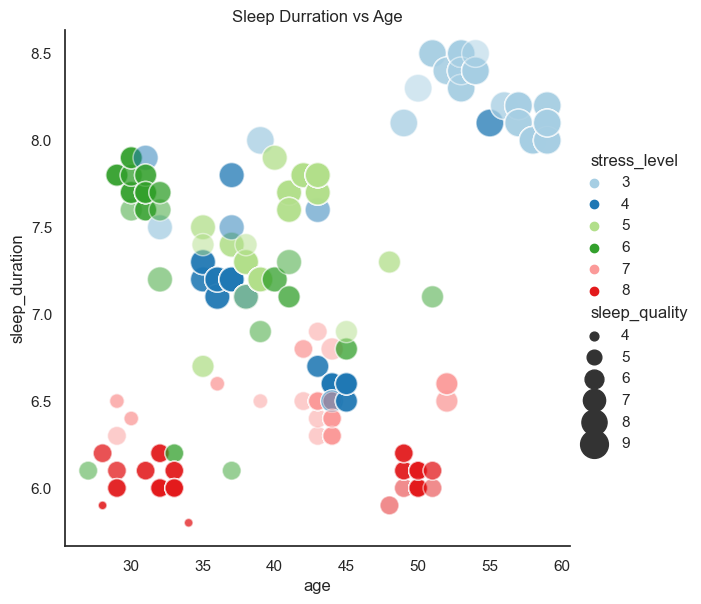

In [6]:
#seaborn scatterplot
sns.set_theme(style="white")
# Plot age gainst sleep durration with regards to stress level and sleep quality
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6, data=merged_data).set(title= "Sleep Durration vs Age")

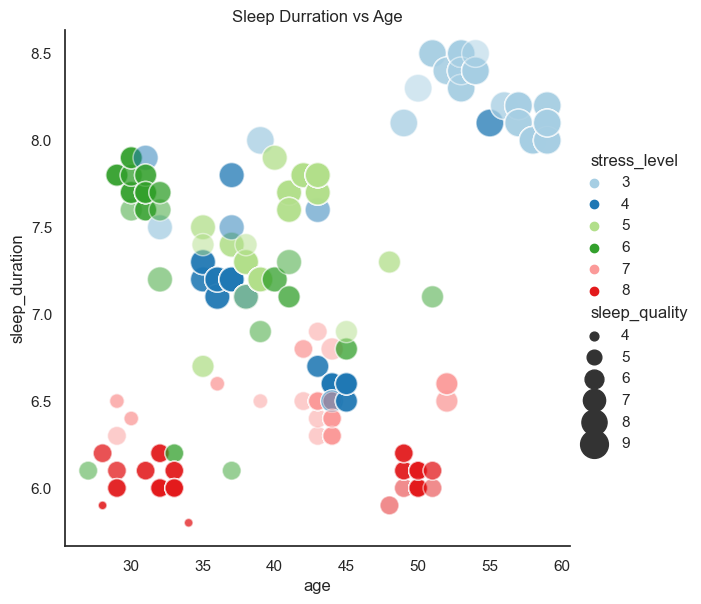

Dropdown(description='Gender:', options={'Male': 0, 'Female': 1}, value=0)

Output()

In [12]:
#seaborn scatterplot
sns.set_theme(style="white")
# Plot age gainst sleep durration with regards to stress level and sleep quality
sns.relplot(x="age", y="sleep_duration", hue="stress_level", size="sleep_quality",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6, data=merged_data).set(title= "Sleep Durration vs Age")
# Create a dropdown widget to select gender
gender_dropdown = widgets.Dropdown(
    options={'Male': 0, 'Female': 1},
    description='Gender:'
)
def draw_plot2(item):
    sns.relplot(x=data.loc[data["gender_id"] == item, "age"],
                y=data.loc[data["gender_id"]== item,"sleep_duration"],
                hue=data.loc[data["gender_id"]== item,"stress_level"],
                size=data.loc[data["gender_id"]== item,"sleep_quality"],
                sizes=(40, 400),
                alpha=.5,
                palette="Paired",
                height=6,
                data=data)\
            .set(title= "Sleep Duration vs Age")
out1= widgets.interactive_output(draw_plot2,{"item":gender_dropdown})
display(gender_dropdown,out1)